<a href="https://www.kaggle.com/code/sharonlogier/100-most-watched-anime?scriptVersionId=224453988" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

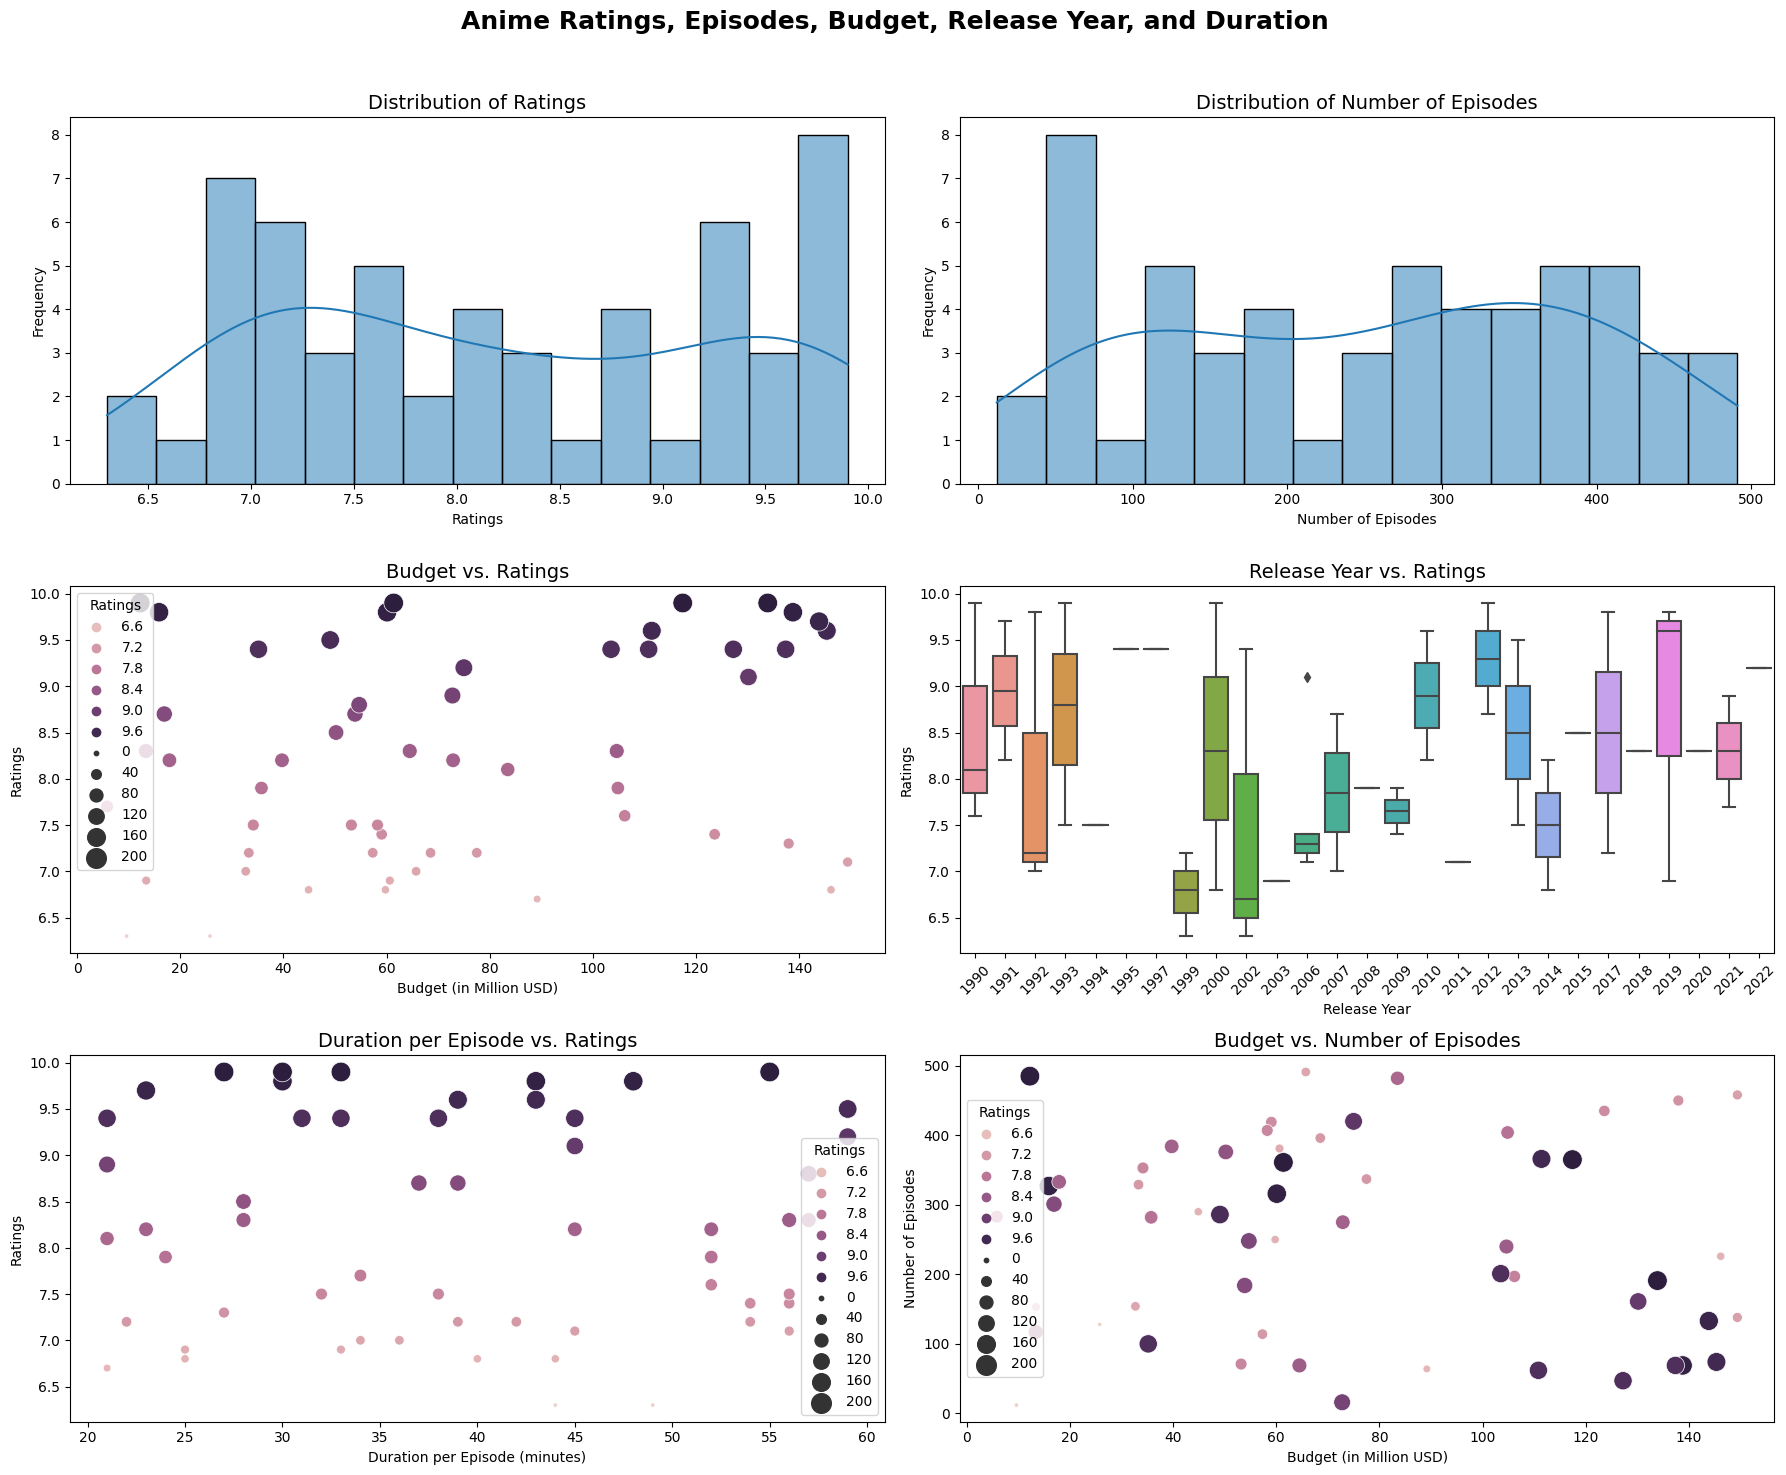

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/input/100-most-watched-anime-in-the-world/most_watched_anime_dataset_100_entries.csv") 

warnings.simplefilter(action="ignore", category=FutureWarning)


# Drop NaN values for numerical analysis
df_cleaned = df.dropna(subset=["Ratings", "Number of Episodes", "Budget (in Million USD)", "Release Year", "Duration per Episode (minutes)"])

# Normalize size for better visualization in scatter plots
size_norm = (df_cleaned["Ratings"] - df_cleaned["Ratings"].min()) / (df_cleaned["Ratings"].max() - df_cleaned["Ratings"].min()) * 200

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle("Anime Ratings, Episodes, Budget, Release Year, and Duration", fontsize=18, fontweight="bold")

# Ratings Distribution
sns.histplot(df_cleaned["Ratings"], bins=15, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Ratings", fontsize=14)
axes[0, 0].set_xlabel("Ratings")
axes[0, 0].set_ylabel("Frequency")

# Number of Episodes Distribution
sns.histplot(df_cleaned["Number of Episodes"], bins=15, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Number of Episodes", fontsize=14)
axes[0, 1].set_xlabel("Number of Episodes")
axes[0, 1].set_ylabel("Frequency")

# Budget vs. Ratings
sns.scatterplot(x=df_cleaned["Budget (in Million USD)"], y=df_cleaned["Ratings"], size=size_norm, hue=df_cleaned["Ratings"], ax=axes[1, 0], sizes=(10, 200))
axes[1, 0].set_title("Budget vs. Ratings", fontsize=14)
axes[1, 0].set_xlabel("Budget (in Million USD)")
axes[1, 0].set_ylabel("Ratings")

# Release Year vs. Ratings
sns.boxplot(x=df_cleaned["Release Year"].astype(int), y=df_cleaned["Ratings"], ax=axes[1, 1])
axes[1, 1].set_title("Release Year vs. Ratings", fontsize=14)
axes[1, 1].set_xlabel("Release Year")
axes[1, 1].set_ylabel("Ratings")
axes[1, 1].tick_params(axis='x', rotation=45)

# Duration per Episode vs. Ratings
sns.scatterplot(x=df_cleaned["Duration per Episode (minutes)"], y=df_cleaned["Ratings"], hue=df_cleaned["Ratings"], size=size_norm, ax=axes[2, 0], sizes=(10, 200))
axes[2, 0].set_title("Duration per Episode vs. Ratings", fontsize=14)
axes[2, 0].set_xlabel("Duration per Episode (minutes)")
axes[2, 0].set_ylabel("Ratings")

# Budget vs. Number of Episodes
sns.scatterplot(x=df_cleaned["Budget (in Million USD)"], y=df_cleaned["Number of Episodes"], hue=df_cleaned["Ratings"], size=size_norm, ax=axes[2, 1], sizes=(10, 200))
axes[2, 1].set_title("Budget vs. Number of Episodes", fontsize=14)
axes[2, 1].set_xlabel("Budget (in Million USD)")
axes[2, 1].set_ylabel("Number of Episodes")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()


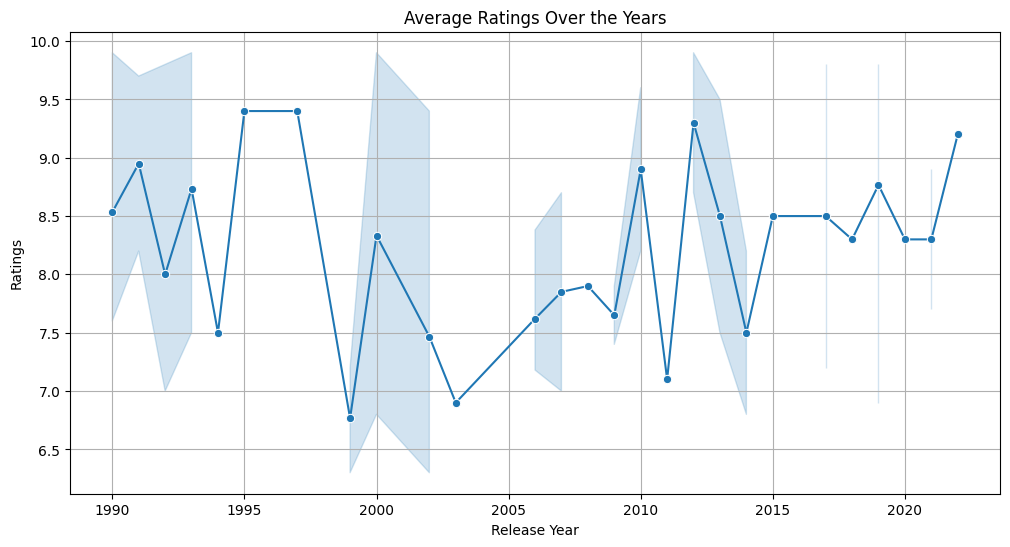

In [2]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned["Release Year"].astype(int), y=df_cleaned["Ratings"], marker="o")
plt.title("Average Ratings Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Ratings")
plt.grid(True)
plt.show()

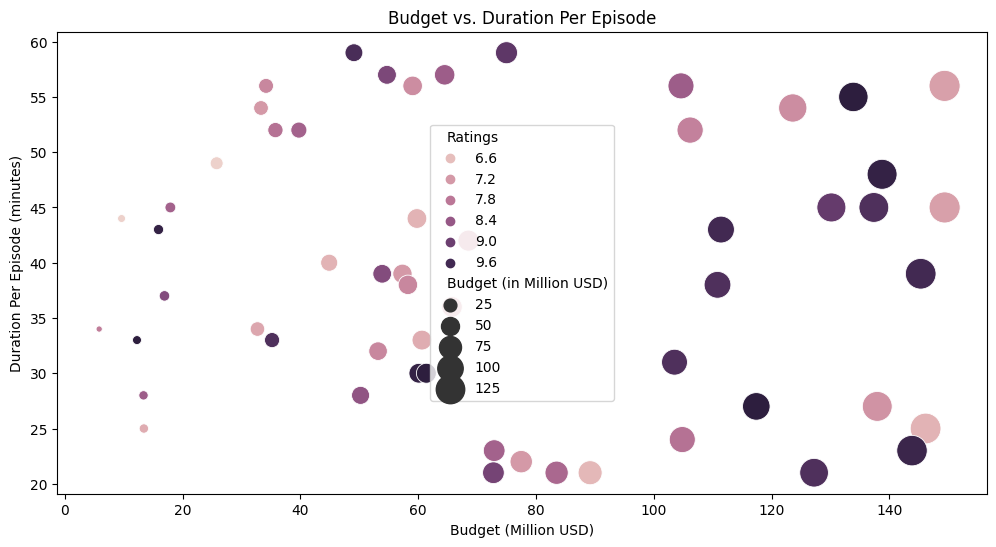

In [3]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_cleaned["Budget (in Million USD)"], y=df_cleaned["Duration per Episode (minutes)"], 
size=df_cleaned["Budget (in Million USD)"], hue=df_cleaned["Ratings"], sizes=(20, 500))
plt.title("Budget vs. Duration Per Episode")
plt.xlabel("Budget (Million USD)")
plt.ylabel("Duration Per Episode (minutes)")
plt.show()

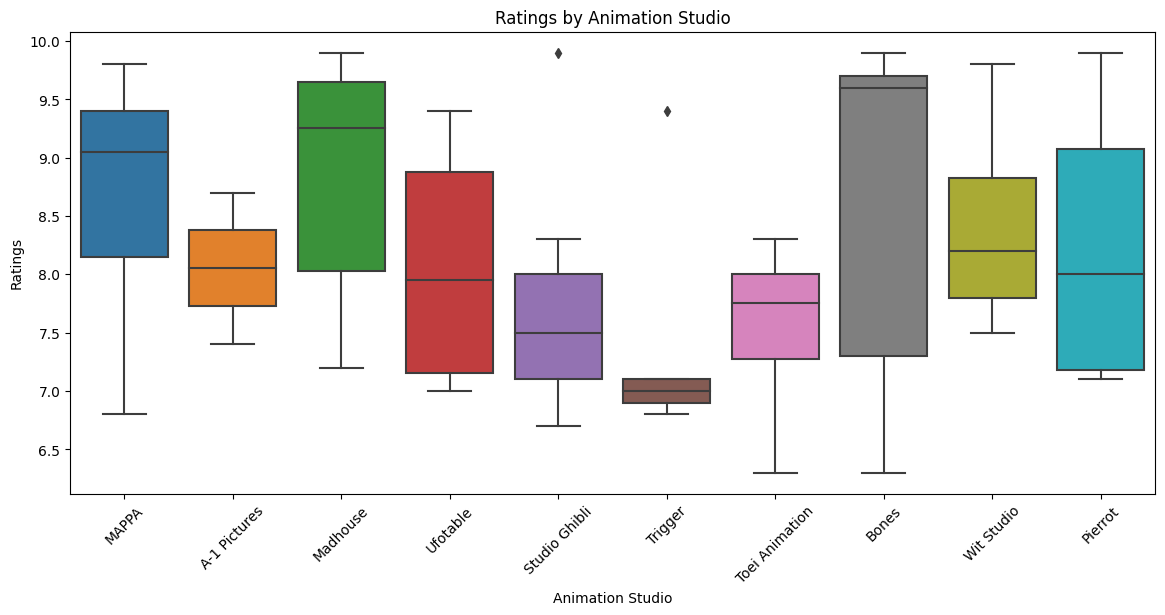

In [4]:
plt.figure(figsize=(14, 6))
top_studios = df_cleaned["Animation Studio Name"].value_counts().index[:10]  # Select top 10 studios
df_top_studios = df_cleaned[df_cleaned["Animation Studio Name"].isin(top_studios)]
sns.boxplot(x=df_top_studios["Animation Studio Name"], y=df_top_studios["Ratings"])
plt.xticks(rotation=45)
plt.title("Ratings by Animation Studio")
plt.xlabel("Animation Studio")
plt.ylabel("Ratings")
plt.show()